In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib.image as mpimg #for image reading
import csv                       #for csv reading
from matplotlib import colors    #for showing true color channels images

try:
    import QOL.plots as pqol #Sam's custom plotting stuff.
    pqol.fixfigsize((1,1))   #make default figsize small
    pqol.scale_fonts((2,2))  #make default fontsize small
except:
    print('pqol not loaded, defaulting to matplotlib.pyplot.')
    pqol=plt

## Pokemon constants:
NTYPES = 18
#enter file locations here!
IMAGESFOLDER0 = 'dataset/images/images/'    #folder where images from original dataset are stored.
IMAGESFOLDERJ = 'dataset/images/image_jpgs' #folder where images from jpg-converted dataset are stored.
       #or folder where you want them stored, if this is the first time you are running this notebook.

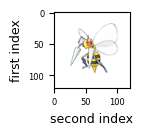

In [18]:
## load image
def get_image(pokename, folder=IMAGESFOLDER0, ext='.png'):
    '''returns image of pokemon named <pokename>.'''
    #should check if filename is abspath and ignore folder if it is.
    return mpimg.imread(os.path.join(folder, pokename+ext))

#example:
imgdata = get_image('beedrill') #chosen because it has nontrivial alpha values on its wings.
plt.imshow(imgdata)
plt.ylabel('first index')
plt.xlabel('second index')
plt.show()

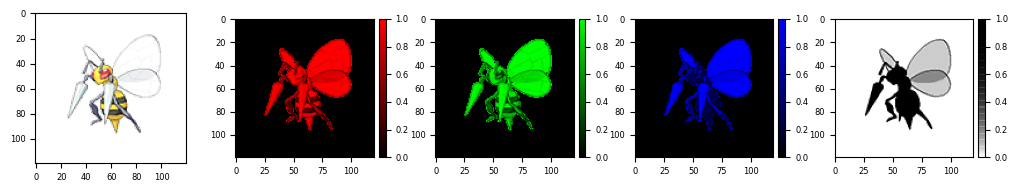

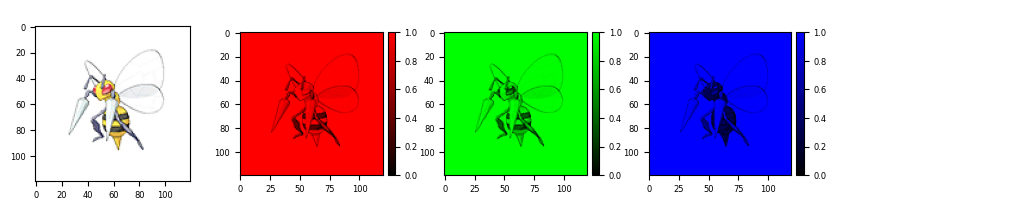

In [3]:
## images in true color channels (rgba), because we can.
def show_rgba(imgdata):
    z = np.zeros(256)
    l = np.linspace(0.0,1.0,256)
    Rcmap = colors.ListedColormap(np.array([l, z, z, z+1]).T)
    Gcmap = colors.ListedColormap(np.array([z, l, z, z+1]).T)
    Bcmap = colors.ListedColormap(np.array([z, z, l, z+1]).T)
    Acmap = colors.ListedColormap(np.array([z, z, z, l  ]).T)
    fig, axs = plt.subplots(1,5, figsize=(10,2))
    plt.sca(axs[0]); plt.imshow(imgdata)
    plt.sca(axs[1]); plt.imshow(imgdata[:,:,0], cmap=Rcmap); pqol.colorbar()
    plt.sca(axs[2]); plt.imshow(imgdata[:,:,1], cmap=Gcmap); pqol.colorbar()
    plt.sca(axs[3]); plt.imshow(imgdata[:,:,2], cmap=Bcmap); pqol.colorbar()
    plt.sca(axs[4]); plt.imshow(imgdata[:,:,3], cmap=Acmap); pqol.colorbar()
    plt.tight_layout(pad=0.1)
show_rgba(imgdata)

## a few images were jpgs (only 3 channels rgb) so we convert 4-channels to 3-channels here.
def img_to_rgb(imgdata):
    if imgdata.shape[-1]==4:
        imgrgb = imgdata[...,:-1]
        imga   = imgdata[...,-1:]
        background = colors.to_rgb('white')
        rgbdata = imgrgb * imga + (1-imga) * background
        rgbdata[rgbdata>1.0]=1.0    #max r,g,b value
    else:
        rgbdata = imgdata
    return rgbdata

def show_rgb(imgdata):
    rgbdata = img_to_rgb(imgdata)
    z = np.zeros(256)
    l = np.linspace(0.0,1.0,256)
    Rcmap = colors.ListedColormap(np.array([l, z, z, z+1]).T)
    Gcmap = colors.ListedColormap(np.array([z, l, z, z+1]).T)
    Bcmap = colors.ListedColormap(np.array([z, z, l, z+1]).T)
    fig, axs = plt.subplots(1,5, figsize=(10,2))
    plt.sca(axs[0]); plt.imshow(rgbdata)
    plt.sca(axs[1]); plt.imshow(rgbdata[:,:,0], cmap=Rcmap); pqol.colorbar()
    plt.sca(axs[2]); plt.imshow(rgbdata[:,:,1], cmap=Gcmap); pqol.colorbar()
    plt.sca(axs[3]); plt.imshow(rgbdata[:,:,2], cmap=Bcmap); pqol.colorbar()
    axs[4].axis('off')
    plt.tight_layout(pad=0.1)
show_rgb(imgdata);

# Put images into dict with pokemon names as keys!

In [4]:
def get_image_and_poke(filename, folder=IMAGESFOLDER0):
    '''returns [imagedata, pokemonname]. e.g. filename='squirtle.png' -> returns [image, 'squirtle'].'''
    name, ext = filename.split('.')
    ext = '.' + ext
    return [get_image(name, folder=folder, ext=ext), name]

def get_all_images(folder):
    '''returns dict of items pokemon:image. e.g. result['squirtle'] = image of squirtle.'''
    allimagenames = os.listdir(folder)
    #should include some line which skips non-images here. (not needed for this data though.)
    temp = [get_image_and_poke(name, folder=folder) for name in allimagenames]
    allimages = {t[1]: t[0] for t in temp}
    return allimages

#allimages = get_all_images(IMAGESFOLDER0) #could run this, but really we want to load from IMAGESFODLERJ.

### Some images were jpgs, others were pngs. Convert all to jpgs.

In [5]:
def save_as_jpg(name, image, folder=IMAGESFOLDERJ):
    '''saves image as jpg named name.jpg to folder.'''
    filename = name if name.endswith('.jpg') else name+'.jpg'
    plt.imsave(os.path.join(folder, filename), img_to_rgb(image))

def save_all_as_jpgs(folder_initial, folder_jpgs):
    '''saves every image in folder_initial as a jpg in folder_jpgs.'''
    allimages = get_all_images(folder_initial)
    for pokemon in allimages.keys():
        save_as_jpg(pokemon, allimages[pokemon], folder=folder_jpgs)
        
#save_all_as_jpgs(IMAGESFOLDER0, IMAGESFOLDERJ) #only need to run this once, ever.

In [6]:
allimages = get_all_images(IMAGESFOLDERJ) #this now has all the jpg images in it! hurray!

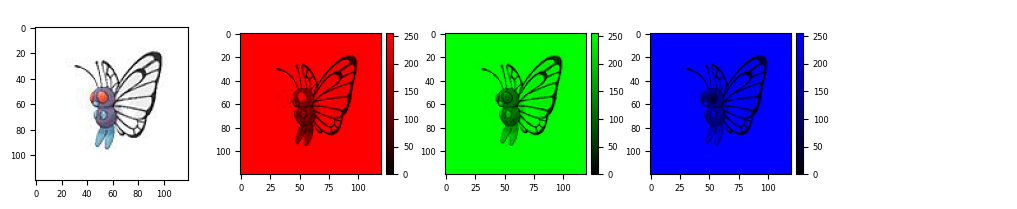

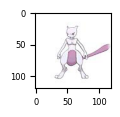

In [7]:
#for example:
show_rgb(allimages['butterfree'])
plt.show()
plt.imshow(allimages['mewtwo'])

# Copy-able image loading for another notebook:

In [8]:
## Here are the necessary functions for use in another notebook.
# they allow to load in all the images which are now saved as jpgs.
"""
IMAGESFOLDER = 'dataset/images/image_jpgs' #folder where images from jpg-converted dataset are stored.
def get_image(pokename, folder=IMAGESFOLDER, ext='.jpg'):
    '''returns image of pokemon named <pokename>.'''
    #should check if filename is abspath and ignore folder if it is.
    return mpimg.imread(os.path.join(folder, pokename+ext))

def get_image_and_poke(filename, folder=IMAGESFOLDER):
    '''returns [imagedata, pokemonname]. e.g. filename='squirtle.png' -> returns [image, 'squirtle'].'''
    name, ext = filename.split('.')
    ext = '.' + ext
    return [get_image(name, folder=folder, ext=ext), name]

def get_all_images(folder):
    '''returns dict of items pokemon:image. e.g. result['squirtle'] = image of squirtle.'''
    allimagenames = os.listdir(folder)
    #should include some line which skips non-images here. (not needed for this data though.)
    temp = [get_image_and_poke(name, folder=folder) for name in allimagenames]
    allimages = {t[1]: t[0] for t in temp}
    return allimages
    
allimages = get_all_images(IMAGESFOLDER) #this now has all the jpg images in it! hurray!
#""";

In [9]:
IMAGES2FOLDERJ = 'dataset/images/archive/pokemon_jpg/pokemon_jpg'

In [15]:
ip = get_image_and_poke('bulbasaur.jpg', folder=IMAGESFOLDERJ)

255

In [10]:
get_image_and_poke('1.jpg', folder=IMAGES2FOLDERJ)

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [11]:
ls dataset/images/archive/pokemon_jpg/pokemon_jpg

1.jpg*                319-mega.jpg*         531.jpg*
10.jpg*               319.jpg*              532.jpg*
100.jpg*              32.jpg*               533.jpg*
101.jpg*              320.jpg*              534.jpg*
102.jpg*              321.jpg*              535.jpg*
103.jpg*              322.jpg*              536.jpg*
104.jpg*              323-mega.jpg*         537.jpg*
105.jpg*              323.jpg*              538.jpg*
106.jpg*              324.jpg*              539.jpg*
107.jpg*              325.jpg*              54.jpg*
108.jpg*              326.jpg*              540.jpg*
109.jpg*              327.jpg*              541.jpg*
11.jpg*               328.jpg*              542.jpg*
110.jpg*              329.jpg*              543.jpg*
111.jpg*              33.jpg*               544.jpg*
112.jpg*              330.jpg*              545.jpg*
113.jpg*              331.jpg*              546.jpg*
114.jpg*              332.jpg*              547.jpg*
115-mega.jpg*         333.jpg*              548